# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
!pip install numpy

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [94]:
bond_lengths = np.linspace(0.2,2.6,30)

In [95]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')
#Run Cisd
CCisd_PES = obtain_PES('h2', bond_lengths, basis,  method='cisd')

converged SCF energy = 0.164175012061695
E = 0.15748213479836348 Eh
converged SCF energy = -0.50859467733718
E = -0.5163121946776867 Eh
converged SCF energy = -0.824355057272618
E = -0.8334570885242663 Eh
converged SCF energy = -0.985164732061365
E = -0.9960263672833691 Eh
converged SCF energy = -1.06726979187071
E = -1.0802932743796436 Eh
converged SCF energy = -1.10529148342858
E = -1.1209145729966634 Eh
converged SCF energy = -1.1172462926436
E = -1.1359474009031039 Eh
converged SCF energy = -1.11346598424933
E = -1.135772429265242 Eh
converged SCF energy = -1.10013463056233
E = -1.1266377898532052 Eh
converged SCF energy = -1.0809713662008
E = -1.1123449437380408 Eh
converged SCF energy = -1.05823160686547
E = -1.0952446198786663 Eh
converged SCF energy = -1.03334779953221
E = -1.076865236176402 Eh
converged SCF energy = -1.00730506460738
E = -1.0582735294493202 Eh
converged SCF energy = -0.980830468645229
E = -1.0402498139503649 Eh
converged SCF energy = -0.954476954404638
E = -1.

E(CCSD) = -0.947652025700413  E_corr = -0.1680731994764068
E = -0.947652025700413 Eh
converged SCF energy = -0.76353464704928
E(CCSD) = -0.9442491430994562  E_corr = -0.1807144960501765
E = -0.9442491430994562 Eh
converged SCF energy = -0.748747830589665
E(CCSD) = -0.9416026655439922  E_corr = -0.1928548349543278
E = -0.9416026655439922 Eh
converged SCF energy = -0.735156079676036
E(CCSD) = -0.9395597844428252  E_corr = -0.204403704766789
E = -0.9395597844428252 Eh
converged SCF energy = -0.722690371579268
E(CCSD) = -0.9379923155364761  E_corr = -0.2153019439572082
E = -0.9379923155364761 Eh
converged SCF energy = -0.711278524726374
E(CCSD) = -0.9367955128321401  E_corr = -0.2255169881057664
E = -0.9367955128321401 Eh
converged SCF energy = -0.700847948858068
E(CCSD) = -0.9358854826353067  E_corr = -0.2350375337772387
E = -0.9358854826353067 Eh
converged SCF energy = -0.691327561197377
E(CCSD) = -0.9351959716501683  E_corr = -0.2438684104527911
E = -0.9351959716501683 Eh
converged SCF 

converged SCF energy = -0.903691294242831
converged SCF energy = -0.903691170066332
Could not converge
converged SCF energy = -0.879784681453097
converged SCF energy = -0.879784563089747
converged SCF energy = -0.879784444726429
converged SCF energy = -0.879784326363142
converged SCF energy = -0.879784207999886
converged SCF energy = -0.879784089636662
converged SCF energy = -0.879783971273469
converged SCF energy = -0.879783852910307
converged SCF energy = -0.879783734547176
converged SCF energy = -0.879783616184077
Could not converge
converged SCF energy = -0.857085111503496
converged SCF energy = -0.857084999541771
converged SCF energy = -0.857084887580079
converged SCF energy = -0.85708477561842
converged SCF energy = -0.857084663656796
converged SCF energy = -0.857084551695205
converged SCF energy = -0.857084439733647
converged SCF energy = -0.857084327772123
converged SCF energy = -0.857084215810632
converged SCF energy = -0.857084103849175
Could not converge
converged SCF energy

<img src="figs/testimage.png">

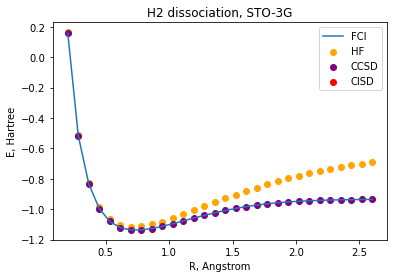

In [53]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')
plt.legend()

## H<sub>2</sub>O symmetric O-H dissociation

In [59]:
bond_lengths = np.linspace(0.5,2.7,30)

In [60]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')
#Run Cisd
CCisd_PES = obtain_PES('h2', bond_lengths, basis,  method='cisd')

converged SCF energy = -73.1294523897688
E = -73.14278405666445 Eh
converged SCF energy = -73.950177882939
E = -73.96732492320687 Eh
converged SCF energy = -74.4282086017597
E = -74.44972726687374 Eh
converged SCF energy = -74.703242719503
E = -74.72986845765729 Eh
converged SCF energy = -74.8556815782024
E = -74.88837974130847 Eh
converged SCF energy = -74.9324428948879
E = -74.97242832765176 Eh
converged SCF energy = -74.9612856365187
E = -75.01002774196999 Eh
converged SCF energy = -74.9591792065215
E = -75.0183865776686 Eh
converged SCF energy = -74.9370114543683
E = -75.0085921615878 Eh
converged SCF energy = -74.902056998469
E = -74.98806132456737 Eh
converged SCF energy = -74.8592408328807
E = -74.96180144903819 Eh
converged SCF energy = -74.8118599354193
E = -74.93314362615413 Eh
converged SCF energy = -74.7620879995802
E = -74.90426241587964 Eh
converged SCF energy = -74.7113683197376
E = -74.87657335050041 Eh
converged SCF energy = -74.6607061839459
E = -74.85101149921778 Eh


E(CCSD) = -74.78012587089304  E_corr = -0.488869556762337
E = -74.78012587089304 Eh
converged SCF energy = -74.2633782892531
E(CCSD) = -74.78189176506177  E_corr = -0.5185134758087199
E = -74.78189176506177 Eh
converged SCF energy = -74.2379607323695
E(CCSD) = -74.78366611287883  E_corr = -0.5457053805093198
E = -74.78366611287883 Eh
SCF not converged.
SCF energy = -73.0377149265924
CCSD not converged
E(CCSD) = -73.00962008994934  E_corr = 0.02809483664307197
E = -73.00962008994934 Eh
converged SCF energy = -74.2764891321039
E(CCSD) = -74.64195094780169  E_corr = -0.3654618156977261
E = -74.64195094780169 Eh
SCF not converged.
SCF energy = -72.997983854069
E(CCSD) = -72.98580525828335  E_corr = 0.01217859578562158
E = -72.98580525828335 Eh
SCF not converged.
SCF energy = -73.0322550736465
E(CCSD) = -72.96892551488182  E_corr = 0.06332955876476025
E = -72.96892551488182 Eh
converged SCF energy = -1.0429962745401
converged SCF energy = -1.04299664981826
converged SCF energy = -1.04299702

Could not converge
converged SCF energy = -0.831394001488182
converged SCF energy = -0.831393897696946
converged SCF energy = -0.831393793905745
converged SCF energy = -0.83139369011458
converged SCF energy = -0.831393586323449
converged SCF energy = -0.831393482532353
converged SCF energy = -0.831393378741292
converged SCF energy = -0.831393274950265
converged SCF energy = -0.831393171159274
converged SCF energy = -0.831393067368318
Could not converge
converged SCF energy = -0.81321729000124
converged SCF energy = -0.813217192531817
converged SCF energy = -0.813217095062429
converged SCF energy = -0.813216997593076
converged SCF energy = -0.813216900123759
converged SCF energy = -0.813216802654476
converged SCF energy = -0.813216705185228
converged SCF energy = -0.813216607716016
converged SCF energy = -0.813216510246838
converged SCF energy = -0.813216412777696
Could not converge
converged SCF energy = -0.796181978803796
converged SCF energy = -0.796181887633886
converged SCF energy 

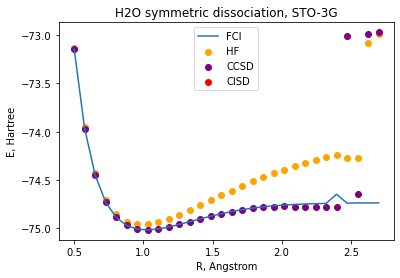

In [61]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')

plt.legend()

# LiH

In [79]:
bond_lengths = np.linspace(0.5,3,30)

#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci');
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf');
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd');
#Run Cisd
CCisd_PES = obtain_PES('lih', bond_lengths, basis,  method='cisd');

converged SCF energy = -7.02841009454194
E = -7.050225035299958 Eh
converged SCF energy = -7.26804708689236
E = -7.2879534696002395 Eh
converged SCF energy = -7.44107445847761
E = -7.460356992041024 Eh
converged SCF energy = -7.56768328561301
E = -7.586386311378288 Eh
converged SCF energy = -7.66025903287973
E = -7.678321383335392 Eh
converged SCF energy = -7.7274731145878
E = -7.744942730097908 Eh
converged SCF energy = -7.77575359030328
E = -7.792777958798496 Eh
converged SCF energy = -7.80988432232636
E = -7.826673205467074 Eh
converged SCF energy = -7.83338092589715
E = -7.850177765114559 Eh
converged SCF energy = -7.84880976990586
E = -7.865873709861722 Eh
converged SCF energy = -7.85805477623604
E = -7.875650974656197 Eh
converged SCF energy = -7.86251947783742
E = -7.880915276244222 Eh
converged SCF energy = -7.8632684660564
E = -7.882733235923437 Eh
converged SCF energy = -7.86112255805786
E = -7.881929505092716 Eh
converged SCF energy = -7.85672264680759
E = -7.879151444504769

E = -7.824836715203008 Eh
converged SCF energy = -7.7622633452928
E(CCSD) = -7.819249343206289  E_corr = -0.05698599791348236
E = -7.819249343206289 Eh
converged SCF energy = -7.75158052408122
E(CCSD) = -7.814138016330276  E_corr = -0.06255749224905434
E = -7.814138016330276 Eh
converged SCF energy = -7.7410441523242
E(CCSD) = -7.809534330102267  E_corr = -0.06849017777806711
E = -7.8095343301022675 Eh
converged SCF energy = -7.73070910064686
E(CCSD) = -7.805447243947855  E_corr = -0.07473814330099815
E = -7.805447243947855 Eh
converged SCF energy = -7.72062370110877
E(CCSD) = -7.801865562618987  E_corr = -0.08124186151021914
E = -7.801865562618987 Eh
converged SCF energy = -7.71082990021722
E(CCSD) = -7.798761959120052  E_corr = -0.08793205890282749
E = -7.798761959120052 Eh
converged SCF energy = -7.02841009454194
converged SCF energy = -7.02841147548059
converged SCF energy = -7.02841285641682
converged SCF energy = -7.02841423735062
converged SCF energy = -7.02841561828198
converge

converged SCF energy = -7.83454662065091
converged SCF energy = -7.83454657702428
converged SCF energy = -7.83454653339761
converged SCF energy = -7.83454648977095
converged SCF energy = -7.83454644614426
converged SCF energy = -7.83454640251754
Could not converge
converged SCF energy = -7.82524203650448
converged SCF energy = -7.82524198963048
converged SCF energy = -7.82524194275646
converged SCF energy = -7.82524189588244
converged SCF energy = -7.8252418490084
converged SCF energy = -7.82524180213434
converged SCF energy = -7.82524175526027
converged SCF energy = -7.82524170838619
converged SCF energy = -7.82524166151209
converged SCF energy = -7.82524161463798
Could not converge
converged SCF energy = -7.81536551819268
converged SCF energy = -7.81536546896326
converged SCF energy = -7.81536541973382
converged SCF energy = -7.81536537050437
converged SCF energy = -7.81536532127492
converged SCF energy = -7.81536527204544
converged SCF energy = -7.81536522281597
converged SCF energy

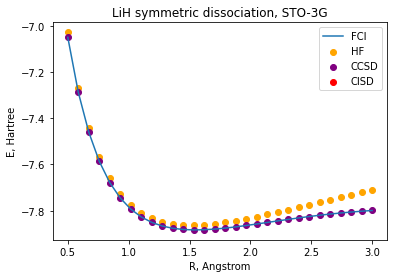

In [80]:
plt.title('LiH symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')


plt.legend()

# H4

In [99]:
bond_lengths = np.linspace(0.5,3,30)

#Run FCI
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci');
#Run HF
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf');
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd');
#Run Cisd
CCisd_PES = obtain_PES('h4', bond_lengths, basis,  method='cisd');

converged SCF energy = -0.490349430194865
E = -0.6413358424214568 Eh
converged SCF energy = -0.99209366655156
E = -1.1515603694216567 Eh
converged SCF energy = -1.29783016364543
E = -1.4661495265936884 Eh
converged SCF energy = -1.48572107639318
E = -1.6631755617880346 Eh
converged SCF energy = -1.59983439208541
E = -1.7891618164917538 Eh
converged SCF energy = -1.665882075367
E = -1.872286075426783 Eh
converged SCF energy = -1.69958739855112
E = -1.9232892843367764 Eh
converged SCF energy = -1.71107946627651
E = -1.9524346891098268 Eh
converged SCF energy = -1.70718899946858
E = -1.9666111320621789 Eh
converged SCF energy = -1.69268769950783
E = -1.9705979753158909 Eh
converged SCF energy = -1.67099465908351
E = -1.9677989541164886 Eh
converged SCF energy = -1.64460361530129
E = -1.9606861006704557 Eh
converged SCF energy = -1.61535593252631
E = -1.9510761108488688 Eh
converged SCF energy = -1.58462239995851
E = -1.9403051710460983 Eh
converged SCF energy = -1.55342738883593
E = -1.92

converged SCF energy = -1.32747676316434
E(CCSD) = -1.828537437294946  E_corr = -0.5010606741306008
E = -1.8285374372949463 Eh
converged SCF energy = -1.31099078074418
E(CCSD) = -1.834930029778608  E_corr = -0.523939249034429
E = -1.8349300297786082 Eh
converged SCF energy = -1.29610466688051
E(CCSD) = -1.840391550014293  E_corr = -0.544286883133784
E = -1.8403915500142927 Eh
converged SCF energy = -1.28270974129457
E(CCSD) = -1.845009254302298  E_corr = -0.5622995130077335
E = -1.8450092543022982 Eh
converged SCF energy = -1.27069171049288
E(CCSD) = -1.848880586895689  E_corr = -0.5781888764028061
E = -1.8488805868956892 Eh
converged SCF energy = -1.25993428574706
E(CCSD) = -1.852103233690281  E_corr = -0.5921689479432242
E = -1.8521032336902807 Eh
converged SCF energy = -1.2503219195173
E(CCSD) = -1.85476960610186  E_corr = -0.6044476865845571
E = -1.85476960610186 Eh
converged SCF energy = -0.490349430194865
converged SCF energy = -0.490352546947745
converged SCF energy = -0.4903556

converged SCF energy = -1.46375312819804
converged SCF energy = -1.46375299170091
converged SCF energy = -1.46375285520382
converged SCF energy = -1.46375271870676
converged SCF energy = -1.46375258220975
converged SCF energy = -1.46375244571277
converged SCF energy = -1.46375230921582
converged SCF energy = -1.46375217271892
converged SCF energy = -1.46375203622205
Could not converge
converged SCF energy = -1.43654948947314
converged SCF energy = -1.43654936103906
converged SCF energy = -1.43654923260502
converged SCF energy = -1.43654910417101
converged SCF energy = -1.43654897573705
converged SCF energy = -1.43654884730313
converged SCF energy = -1.43654871886926
converged SCF energy = -1.43654859043542
converged SCF energy = -1.43654846200162
converged SCF energy = -1.43654833356787
Could not converge
converged SCF energy = -1.41107406512717
converged SCF energy = -1.41107394540461
converged SCF energy = -1.41107382568209
converged SCF energy = -1.41107370595961
converged SCF energ

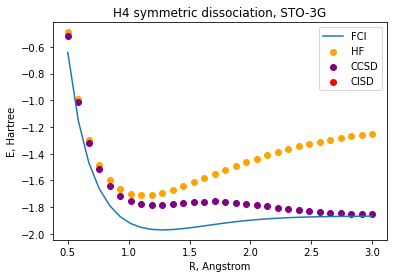

In [82]:
plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')


plt.legend()

# N2

In [83]:
bond_lengths = np.linspace(0.5,3,30)

#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci');
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf');
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd');
#Run Cisd
CCisd_PES = obtain_PES('n2', bond_lengths, basis,  method='cisd');

converged SCF energy = -100.573097041036
E = -100.61161344815145 Eh
converged SCF energy = -103.53346451053
E = -103.58238944121607 Eh
converged SCF energy = -105.300094320512
E = -105.36296053279851 Eh
converged SCF energy = -106.347537884057
E = -106.42540934123392 Eh
converged SCF energy = -106.952137806843
E = -107.04639733236385 Eh
converged SCF energy = -107.281823203748
E = -107.39471452340065 Eh
converged SCF energy = -107.441458201382
E = -107.57573927169243 Eh
converged SCF energy = -107.497328464142
E = -107.65598371362884 Eh
converged SCF energy = -107.491300392473
E = -107.67736482129472 Eh
converged SCF energy = -107.449572264866
E = -107.66603443001402 Eh
converged SCF energy = -107.388291376491
E = -107.63807138596867 Eh
converged SCF energy = -107.317233352693
E = -107.60324292044695 Eh
converged SCF energy = -107.24224490345
E = -107.56750759234285 Eh
converged SCF energy = -107.166846186899
E = -107.53458115185147 Eh
converged SCF energy = -107.093224600536
E = -107.

CCSD not converged
E(CCSD) = -107.0659648535809  E_corr = -0.4079009138356794
E = -107.06596485358094 Eh
converged SCF energy = -106.623450509275
CCSD not converged
E(CCSD) = -107.0534032953156  E_corr = -0.4299527860401596
E = -107.05340329531558 Eh
converged SCF energy = -106.59234942541
E(CCSD) = -107.6377881361088  E_corr = -1.045438710698987
E = -107.6377881361088 Eh
converged SCF energy = -106.564465601604
CCSD not converged
E(CCSD) = -106.9337724353821  E_corr = -0.3693068337776258
E = -106.93377243538208 Eh
converged SCF energy = -106.539525239027
CCSD not converged
E(CCSD) = -107.0060308716593  E_corr = -0.4665056326324173
E = -107.00603087165935 Eh
converged SCF energy = -106.517270778636
CCSD not converged
E(CCSD) = -107.059822072616  E_corr = -0.5425512939804027
E = -107.05982207261604 Eh
converged SCF energy = -106.497455899054
CCSD not converged
E(CCSD) = -106.8868011295857  E_corr = -0.3893452305316152
E = -106.88680112958572 Eh
converged SCF energy = -106.479842622837
C

converged SCF energy = -106.956467404623
converged SCF energy = -106.956467092523
converged SCF energy = -106.956466780422
Could not converge
converged SCF energy = -106.894802342376
converged SCF energy = -106.894802053791
converged SCF energy = -106.894801765205
converged SCF energy = -106.894801476619
converged SCF energy = -106.894801188034
converged SCF energy = -106.894800899448
converged SCF energy = -106.894800610863
converged SCF energy = -106.894800322278
converged SCF energy = -106.894800033693
converged SCF energy = -106.894799745108
Could not converge
converged SCF energy = -106.838041923849
converged SCF energy = -106.838041659365
converged SCF energy = -106.838041394881
converged SCF energy = -106.838041130397
converged SCF energy = -106.838040865914
converged SCF energy = -106.838040601431
converged SCF energy = -106.838040336947
converged SCF energy = -106.838040072464
converged SCF energy = -106.838039807981
converged SCF energy = -106.838039543498
Could not converge


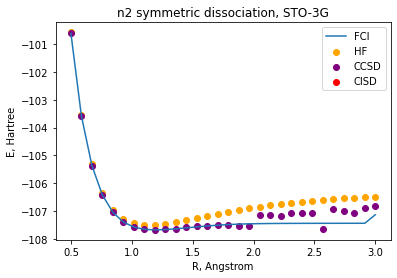

In [84]:
plt.title('n2 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')


plt.legend()

# NH3

In [85]:
bond_lengths = np.linspace(0.5,3,30)

#Run FCI
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci');
#Run HF
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf');
#Run CCSD
CCSD_PES = obtain_PES('nh3', bond_lengths, basis,  method='ccsd');
#Run Cisd
CCisd_PES = obtain_PES('nh3', bond_lengths, basis,  method='cisd');

converged SCF energy = -52.4237942933971
E = -52.442946933932 Eh
converged SCF energy = -53.8369603701995
E = -53.860960362779934 Eh
converged SCF energy = -54.6334496492995
E = -54.663267232011364 Eh
converged SCF energy = -55.0764342842208
E = -55.113072068583804 Eh
converged SCF energy = -55.3112544489484
E = -55.35593042865296 Eh
converged SCF energy = -55.421084525366
E = -55.47532040780108 Eh
converged SCF energy = -55.4543953905085
E = -55.52010470298593 Eh
converged SCF energy = -55.4401763968938
E = -55.51974998144168 Eh
converged SCF energy = -55.3965030349032
E = -55.49287563662728 Eh
converged SCF energy = -55.3351025757442
E = -55.4517773256909 Eh
converged SCF energy = -55.2636981963338
E = -55.40468565016348 Eh
converged SCF energy = -55.1873108978672
E = -55.35694598752624 Eh
converged SCF energy = -55.1091348729602
E = -55.31180367212738 Eh
converged SCF energy = -55.0312005975398
E = -55.27107997589343 Eh
converged SCF energy = -54.9548569060344
E = -55.23573742060476

E = -54.975849893553224 Eh
converged SCF energy = -54.429503554541
CCSD not converged
E(CCSD) = -54.84597282178721  E_corr = -0.4164692672462096
E = -54.84597282178721 Eh
converged SCF energy = -54.3920836177398
CCSD not converged
E(CCSD) = -54.93995201430513  E_corr = -0.5478683965653321
E = -54.939952014305135 Eh
converged SCF energy = -54.3581646367523
E(CCSD) = -55.39533677344071  E_corr = -1.037172136688397
E = -55.39533677344071 Eh
converged SCF energy = -54.327518265492
CCSD not converged
E(CCSD) = -54.99255330295081  E_corr = -0.6650350374588436
E = -54.99255330295081 Eh
converged SCF energy = -54.2999044746596
CCSD not converged
E(CCSD) = -54.98082870530931  E_corr = -0.6809242306496921
E = -54.98082870530931 Eh
converged SCF energy = -54.2750816952595
CCSD not converged
E(CCSD) = -54.92057020081519  E_corr = -0.6454885055556998
E = -54.92057020081519 Eh
converged SCF energy = -54.2528115489574
CCSD not converged
E(CCSD) = -54.96402099457341  E_corr = -0.7112094456160275
E = -

converged SCF energy = -54.810624658966
Could not converge
converged SCF energy = -54.7441738330043
converged SCF energy = -54.7441735200862
converged SCF energy = -54.7441732071347
converged SCF energy = -54.7441728941959
converged SCF energy = -54.7441725812655
converged SCF energy = -54.744172268327
converged SCF energy = -54.7441719553995
converged SCF energy = -54.7441716424585
converged SCF energy = -54.7441713295312
converged SCF energy = -54.7441710165905
Could not converge
converged SCF energy = -54.6824535594498
converged SCF energy = -54.6824532719081
converged SCF energy = -54.6824529843787
converged SCF energy = -54.682452696818
converged SCF energy = -54.6824524093082
converged SCF energy = -54.6824521217478
converged SCF energy = -54.6824518342382
converged SCF energy = -54.6824515466781
converged SCF energy = -54.6824512591496
converged SCF energy = -54.682450971609
Could not converge
converged SCF energy = -54.6266097247382
converged SCF energy = -54.6266094692983
conv

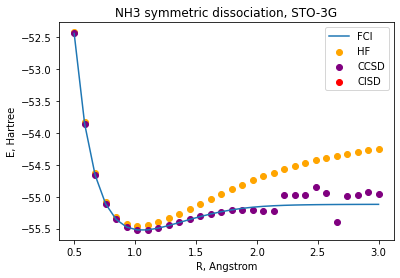

In [86]:
#Plot LiH PESs

plt.title('NH3 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')

plt.legend()

## Large Seperation

converged SCF energy = -0.548533339330965
E = -0.9331636991145971 Eh
converged SCF energy = -0.548530343128974
E = -0.9331636991145908 Eh
converged SCF energy = -0.548527353637402
E = -0.9331636991145895 Eh
converged SCF energy = -0.54852437083373
E = -0.9331636991145915 Eh
converged SCF energy = -0.548521394695541
E = -0.9331636991145973 Eh
converged SCF energy = -0.548518425200515
E = -0.9331636991145663 Eh
converged SCF energy = -0.54851546232644
E = -0.9331636991145772 Eh
converged SCF energy = -0.548512506051193
E = -0.93316369911459 Eh
converged SCF energy = -0.548509556352755
E = -0.9331636991145644 Eh
converged SCF energy = -0.548506613209201
E = -0.9331636991145793 Eh
converged SCF energy = -0.548533339330965
converged SCF energy = -0.548533339330965
E = -0.5485333393309649 Eh
converged SCF energy = -0.548530343128974
converged SCF energy = -0.548530343128974
E = -0.548530343128974 Eh
converged SCF energy = -0.548527353637402
converged SCF energy = -0.548527353637402
E = -0.54

converged SCF energy = -0.548521394661829

WARN:  diis singular, eigh(h) [-2.23777661e+00 -4.42388629e-09 -7.30464299e-10  7.73339772e-09
  3.83991462e-08  2.23777680e+00  2.22522922e+09]

converged SCF energy = -0.548521394650592

WARN:  diis singular, eigh(h) [-2.23777664e+00 -1.88346875e-09  3.43837253e-09  5.89567682e-09
  2.60770321e-08  2.23777676e+00  2.22522929e+09]

converged SCF energy = -0.548521394639355

WARN:  diis singular, eigh(h) [-2.23777680e+00 -2.96249276e-08 -8.99843572e-09  4.65626516e-10
  9.04833829e-10  2.23777660e+00  2.22522935e+09]

converged SCF energy = -0.548521394628118

WARN:  diis singular, eigh(h) [-2.23777789e+00 -1.30385160e-08  1.86264515e-09  1.86264515e-09
  1.86264515e-09  2.23777788e+00  2.22522941e+09]

converged SCF energy = -0.54852139461688

WARN:  diis singular, eigh(h) [-2.23777790e+00 -2.04661010e-09 -1.86264515e-09 -8.02141302e-10
  1.21619772e-08  2.23777786e+00  2.22522947e+09]

converged SCF energy = -0.548521394605643

WARN:  diis s

converged SCF energy = -0.54850955628593

WARN:  diis singular, eigh(h) [-2.23776197e+00 -1.20037132e-08 -2.22412665e-09  1.22168490e-09
  1.83028404e-09  2.23776200e+00  2.28602436e+09]

converged SCF energy = -0.548509556274792

WARN:  diis singular, eigh(h) [-2.23776197e+00 -3.16478243e-09 -1.24176343e-09  1.84997409e-09
  2.55657177e-09  2.23776200e+00  2.28602442e+09]

converged SCF energy = -0.548509556263655

WARN:  diis singular, eigh(h) [-2.23776129e+00 -1.16686649e-09 -1.21703810e-10  8.96434482e-10
  1.52932970e-08  2.23776162e+00  2.28602445e+09]

converged SCF energy = -0.548509556252517

WARN:  diis singular, eigh(h) [-2.23776252e+00 -3.36971305e-09 -1.86264515e-09 -3.55577250e-10
  7.26431608e-08  2.23776270e+00  2.28602452e+09]

Could not converge
converged SCF energy = -0.548506613209201

WARN:  diis singular, eigh(h) [-2.23775779e+00 -6.20881716e-09 -1.05509311e-09  5.22847761e-10
  6.74106252e-09  2.23775755e+00  2.30143703e+09]

converged SCF energy = -0.54850661319

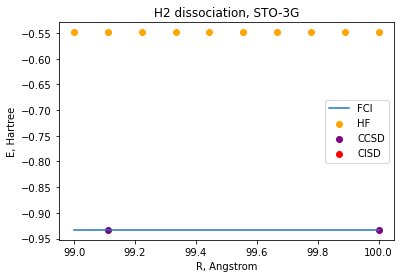

In [102]:
bond_lengths = np.linspace(99,100,10)
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')
#Run Cisd
CCisd_PES = obtain_PES('h2', bond_lengths, basis,  method='cisd')

#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')
plt.legend()



In [103]:
print(FCI_PES)
print(HF_PES)
print(CCSD_PES)
print(CCisd_PES) 


array([-1.8663274, -1.8663274, -1.8663274, -1.8663274, -1.8663274,
       -1.8663274, -1.8663274, -1.8663274, -1.8663274, -1.8663274])

converged SCF energy = -1.09550109869598
E = -1.8663273982290998 Eh
converged SCF energy = -1.09549686142649
E = -1.8663273982291009 Eh
converged SCF energy = -1.09549263364696
E = -1.866327398229101 Eh
converged SCF energy = -1.09548841532555
E = -1.8663273982290989 Eh
converged SCF energy = -1.09548420643057
E = -1.8663273982291002 Eh
converged SCF energy = -1.09548000693043
E = -1.8663273982290995 Eh
converged SCF energy = -1.09547581679373
E = -1.8663273982291009 Eh
converged SCF energy = -1.09547163598918
E = -1.8663273982291007 Eh
converged SCF energy = -1.09546746448564
E = -1.8663273982290998 Eh
converged SCF energy = -1.09546330225211
E = -1.8663273982291015 Eh
converged SCF energy = -1.09550109869598
converged SCF energy = -1.09550109869598
E = -1.0955010986959794 Eh
converged SCF energy = -1.09549686142649
converged SCF energy = -1.09549686142649
E = -1.0954968614264882 Eh
converged SCF energy = -1.09549263364696
converged SCF energy = -1.09549263364696
E = -1.09549263364696

converged SCF energy = -1.09548420639878

WARN:  diis singular, eigh(h) [-2.23692244e+00 -1.47024790e-07 -3.24425289e-08  1.87702230e-08
  4.14878068e-08  2.23691691e+00  3.60663201e+10]

converged SCF energy = -1.09548420638289

WARN:  diis singular, eigh(h) [-2.23691799e+00 -5.27271858e-08  1.76656300e-08  2.01603946e-08
  7.45058060e-08  2.23692136e+00  3.60663225e+10]

converged SCF energy = -1.095484206367

WARN:  diis singular, eigh(h) [-2.23691769e+00 -5.95094297e-08 -9.52150875e-11  8.84456019e-08
  7.46019425e-07  2.23692211e+00  3.60663168e+10]

converged SCF energy = -1.09548420635111

WARN:  diis singular, eigh(h) [-2.23692117e+00 -6.15452611e-07 -2.61011172e-08  4.04274982e-08
  6.46844272e-08  2.23691819e+00  3.60663178e+10]

converged SCF energy = -1.09548420633521

WARN:  diis singular, eigh(h) [-2.23691896e+00 -1.98097790e-07 -1.49011612e-07 -2.45761660e-08
  1.40576992e-08  2.23692039e+00  3.60663243e+10]

converged SCF energy = -1.09548420631932

WARN:  diis singular

converged SCF energy = -1.09550109863184
converged SCF energy = -1.09550109861581
converged SCF energy = -1.09550109859977
converged SCF energy = -1.09550109858373
converged SCF energy = -1.0955010985677
converged SCF energy = -1.09550109855167
converged SCF energy = -1.09550109853563
converged SCF energy = -1.0955010985196
Could not converge
converged SCF energy = -1.0954968612665
converged SCF energy = -1.0954968612505
converged SCF energy = -1.0954968612345
converged SCF energy = -1.0954968612185
converged SCF energy = -1.0954968612025
converged SCF energy = -1.09549686118651
converged SCF energy = -1.09549686117051
converged SCF energy = -1.09549686115451
converged SCF energy = -1.09549686113851
converged SCF energy = -1.09549686112251
Could not converge
converged SCF energy = -1.09549263348733
converged SCF energy = -1.09549263347137
converged SCF energy = -1.0954926334554
converged SCF energy = -1.09549263343944
converged SCF energy = -1.09549263342348
converged SCF energy = -1.0

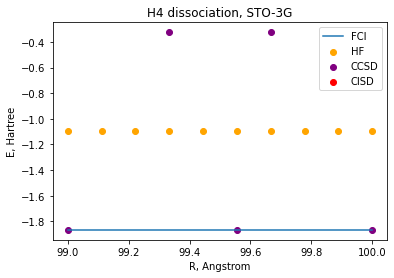

In [106]:
bond_lengths = np.linspace(99,100,10)
#Run FCI
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci')
#Run HF
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf')
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd')
#Run Cisd
CCisd_PES = obtain_PES('h4', bond_lengths, basis,  method='cisd')

#Plot H2 PESs

plt.title('H4 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CCisd_PES, label='CISD', color='red')
plt.legend()




In [107]:
print(FCI_PES)
print(HF_PES)
#Run CCSD
print(CCSD_PES)
#Run Cisd
print(CCisd_PES) 

[-1.8663274 -1.8663274 -1.8663274 -1.8663274 -1.8663274 -1.8663274
 -1.8663274 -1.8663274 -1.8663274 -1.8663274]
[-1.0955011  -1.09549686 -1.09549263 -1.09548842 -1.09548421 -1.09548001
 -1.09547582 -1.09547164 -1.09546746 -1.0954633 ]
[-1.8663274          nan         nan -0.32464943         nan -1.8663274
 -0.32462423         nan         nan -1.86632742]
[nan nan nan nan nan nan nan nan nan nan]


## Methods

In [123]:
import pyscf
from pyscf import cc, gto
basis=['sto3g','ccpvdz','ccpvtz','ccpvqz','ccpv5z']

In [142]:
bond_lengths = np.linspace(0.2,3,15)

hf1=[];
ccsd1=[];
Cisd1=[];
#CCsdt1=[];
for i in range(len(basis)):
    print(basis[i]);
    #Run FCI
    FCI_PES = obtain_PES('h2', bond_lengths, basis[i], method='fci');
    #Run HF
    HF_PES = obtain_PES('h2', bond_lengths, basis[i],  method='hf');
    #Run CCSD
    CCSD_PES = obtain_PES('h2', bond_lengths, basis[i],  method='ccsd');
    #Run Cisd
    Cisd_PES = obtain_PES('h2', bond_lengths, basis[i],  method='cisd');
    #Run Ccsdt
    #CCsdt_PES = obtain_PES('h2', bond_lengths, basis[i],  method='ccsdt');
 
    hf1.append(sum(100*abs((HF_PES-FCI_PES)/FCI_PES))/15);
    ccsd1.append(sum(100*abs((CCSD_PES-FCI_PES)/FCI_PES))/15);
    Cisd1.append(sum(100*abs((Cisd_PES-FCI_PES)/FCI_PES))/15);
    #CCsdt1.append(CCsdt_PES);




sto3g
converged SCF energy = 0.164175012061695
E = 0.15748213479836348 Eh
converged SCF energy = -0.904361394163539
E = -0.9141497046270812 Eh
converged SCF energy = -1.1011282422677
E = -1.11628600686954 Eh
converged SCF energy = -1.11085039747659
E = -1.1341476666770967 Eh
converged SCF energy = -1.06610864931794
E = -1.1011503302326187 Eh
converged SCF energy = -1.00510670656849
E = -1.0567407463052572 Eh
converged SCF energy = -0.941480654707798
E = -1.0154682492882445 Eh
converged SCF energy = -0.881732449946056
E = -0.9834727290331728 Eh
converged SCF energy = -0.828848147926977
E = -0.9618169527925807 Eh
converged SCF energy = -0.783792654277353
E = -0.9486411121761857 Eh
converged SCF energy = -0.746401349991158
E = -0.9412240336932614 Eh
converged SCF energy = -0.715910060453806
E = -0.937254953009629 Eh
converged SCF energy = -0.691327561197377
E = -0.9351960308474734 Eh
converged SCF energy = -0.671668859751728
E = -0.9341510956709369 Eh
converged SCF energy = -0.65604825114

converged SCF energy = -0.828847736200041
converged SCF energy = -0.828847633268394
converged SCF energy = -0.828847530336782
converged SCF energy = -0.828847427405205
converged SCF energy = -0.828847324473664
converged SCF energy = -0.828847221542156
Could not converge
converged SCF energy = -0.783792654277353
converged SCF energy = -0.783792567901083
converged SCF energy = -0.783792481524846
converged SCF energy = -0.783792395148643
converged SCF energy = -0.783792308772475
converged SCF energy = -0.78379222239634
converged SCF energy = -0.78379213602024
converged SCF energy = -0.783792049644173
converged SCF energy = -0.783791963268141
converged SCF energy = -0.783791876892142
Could not converge
converged SCF energy = -0.746401349991158
converged SCF energy = -0.746401279043336
converged SCF energy = -0.746401208095542
converged SCF energy = -0.74640113714778
converged SCF energy = -0.746401066200049
converged SCF energy = -0.746400995252348
converged SCF energy = -0.746400924304677

converged SCF energy = -0.9143626477968
converged SCF energy = -0.914363468732294
converged SCF energy = -0.914364289665028
Could not converge
converged SCF energy = -1.10689394195772
converged SCF energy = -1.10689408863546
converged SCF energy = -1.10689423531256
converged SCF energy = -1.10689438198901
converged SCF energy = -1.10689452866481
converged SCF energy = -1.10689467533998
converged SCF energy = -1.10689482201449
converged SCF energy = -1.10689496868836
converged SCF energy = -1.10689511536159
converged SCF energy = -1.10689526203417
Could not converge
converged SCF energy = -1.12700045353497
converged SCF energy = -1.12700042679904
converged SCF energy = -1.12700040006293
converged SCF energy = -1.12700037332664
converged SCF energy = -1.12700034659016
converged SCF energy = -1.1270003198535
converged SCF energy = -1.12700029311666
converged SCF energy = -1.12700026637964
converged SCF energy = -1.12700023964243
converged SCF energy = -1.12700021290504
Could not converge


E = -0.8608597986410116 Eh
converged SCF energy = -0.84519260686231
converged SCF energy = -0.845192606862311
E = -0.8451926068623113 Eh
converged SCF energy = -0.831766530579205
converged SCF energy = -0.831766530579206
E = -0.8317665305792057 Eh
converged SCF energy = 0.0581544251977579
E(CCSD) = 0.02160956873007923  E_corr = -0.03654485646767915
E = 0.02160956873007923 Eh
converged SCF energy = -0.939589706299016
E(CCSD) = -0.9768132269778793  E_corr = -0.03722352067886161
E = -0.9768132269778793 Eh
converged SCF energy = -1.11541224534989
E(CCSD) = -1.153520543163045  E_corr = -0.03810829781315694
E = -1.1535205431630446 Eh
converged SCF energy = -1.13029179581646
E(CCSD) = -1.170405681293709  E_corr = -0.04011388547724982
E = -1.1704056812937087 Eh
converged SCF energy = -1.10206079310657
E(CCSD) = -1.145757493189947  E_corr = -0.04369670008337625
E = -1.1457574931899468 Eh
converged SCF energy = -1.06286729949496
E(CCSD) = -1.112066170403492  E_corr = -0.04919887090853128
E = -1.

converged SCF energy = -0.845192333022449
Could not converge
converged SCF energy = -0.831766530579205
converged SCF energy = -0.831766504503379
converged SCF energy = -0.83176647842756
converged SCF energy = -0.83176645235175
converged SCF energy = -0.831766426275949
converged SCF energy = -0.831766400200155
converged SCF energy = -0.831766374124371
converged SCF energy = -0.831766348048595
converged SCF energy = -0.831766321972827
converged SCF energy = -0.831766295897067
Could not converge
ccpvqz
converged SCF energy = 0.046239477230988
E = 0.006921756219853581 Eh
converged SCF energy = -0.942265058327129
E = -0.9808670231076151 Eh
converged SCF energy = -1.11619557869466
E = -1.155314362865218 Eh
converged SCF energy = -1.13074823943938
E = -1.171820288070975 Eh
converged SCF energy = -1.10245744678024
E = -1.1471004099713054 Eh
converged SCF energy = -1.06326553888182
E = -1.1134044137275148 Eh
converged SCF energy = -1.02358293789222
E = -1.0814897901410365 Eh
converged SCF energ

converged SCF energy = -0.986938585525208
converged SCF energy = -0.986938512715341
converged SCF energy = -0.98693843990549
converged SCF energy = -0.986938367095658
converged SCF energy = -0.986938294285847
converged SCF energy = -0.986938221476051
converged SCF energy = -0.986938148666276
Could not converge
converged SCF energy = -0.954366608149306
converged SCF energy = -0.95436654416405
converged SCF energy = -0.954366480178812
converged SCF energy = -0.954366416193592
converged SCF energy = -0.954366352208392
converged SCF energy = -0.95436628822321
converged SCF energy = -0.954366224238047
converged SCF energy = -0.9543661602529
converged SCF energy = -0.954366096267772
converged SCF energy = -0.954366032282664
Could not converge
converged SCF energy = -0.925941645937856
converged SCF energy = -0.925941590429645
converged SCF energy = -0.925941534921453
converged SCF energy = -0.925941479413276
converged SCF energy = -0.925941423905116
converged SCF energy = -0.925941368396973
c

Exception ignored in: <function AO2MOpt.__del__ at 0x7fd6154ec670>
Traceback (most recent call last):
  File "/Users/jisukim/opt/anaconda3/lib/python3.8/site-packages/pyscf/ao2mo/_ao2mo.py", line 59, in __del__
    try:
KeyboardInterrupt: 


Could not converge
Could not converge
converged SCF energy = -1.02371415060336
Could not converge
Could not converge
converged SCF energy = -0.954585649372242
converged SCF energy = -0.95458558552503
converged SCF energy = -0.954585521677838
converged SCF energy = -0.954585457830664
converged SCF energy = -0.954585393983511
Could not converge
Could not converge
Could not converge
Could not converge
converged SCF energy = -0.862755561395616
converged SCF energy = -0.862755526478413
E = -1.0041277619665543 Eh
converged SCF energy = -0.847362389427883
converged SCF energy = -0.847362359561841
E = -1.0022862637965415 Eh
Could not converge


Exception ignored in: <function _TemporaryFileCloser.__del__ at 0x7fd5f0081790>
Traceback (most recent call last):
  File "/Users/jisukim/opt/anaconda3/lib/python3.8/tempfile.py", line 439, in __del__
    def __del__(self):
KeyboardInterrupt: 


Could not converge
Could not converge
Could not converge
converged SCF energy = -1.13088472167055
converged SCF energy = -1.13088468903324


KeyboardInterrupt: 

In [145]:
[hf1,
    ccsd1,
    Cisd1]

[[12.923749902013245, 9.358141560903553, 19.13529488009182, 45.74609512963843],
 [2.359596313135976e-06,
  1.3001044871152652e-06,
  2.333312978343684e-05,
  2.6620848086143626e-06],
 [nan, nan, nan, nan]]

In [130]:
Cisd

NameError: name 'Cisd' is not defined

In [ ]:
bond_lengths = np.linspace(0.2,3,15)

#Run HF
HF_PES = obtain_PES('h2', bond_lengths, 'ccpv5z',  method='hf');
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, 'ccpv5z',  method='ccsd');

hf1.append(sum(100*abs((HF_PES-FCI_PES)/FCI_PES))/15);
ccsd1.append(sum(100*abs((CCSD_PES-FCI_PES)/FCI_PES))/15);


